In [3]:
#Author:Rhea Sukthanker

import numpy as np
import pandas as pd
#Read all datasets and concatenate 

mitbih_train=pd.read_csv("mitbih_train.csv",header=None)
mitbih_test=pd.read_csv("mitbih_test.csv",header=None)
mitbih=pd.concat([mitbih_train,mitbih_test],axis=0)
ptbdb_normal=pd.read_csv("ptbdb_normal.csv",header=None)
ptbdb_abnormal=pd.read_csv("ptbdb_abnormal.csv",header=None)
ptbdb=pd.concat([ptbdb_normal,ptbdb_abnormal],axis=0)

In [7]:
from sklearn.cluster import KMeans
X=np.array(mitbih.iloc[:,0:187])
#cluster the MITBIH dataset into 5 clusters (corresponding to the 5 classes)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

In [10]:
y_kmeans = kmeans.predict(X)

In [11]:
y_kmeans

array([0, 0, 0, ..., 0, 4, 2], dtype=int32)

In [12]:
from sklearn import decomposition
#compute 2-D representation of the datapoints using pca for plotting purposes
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_2D= pca.transform(X)

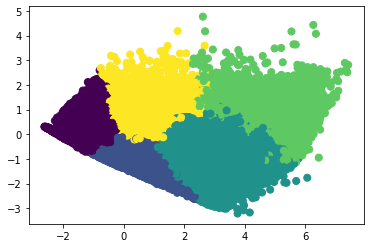

In [18]:
import matplotlib.pyplot as plt
#plot the 2-d datapoints and color them corresponding to k-means clusters
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y_kmeans, s=50, cmap='viridis')

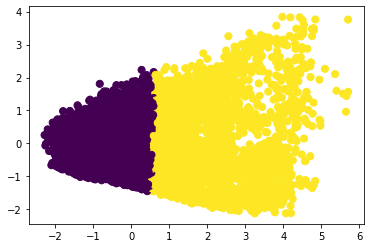

In [19]:
from sklearn.cluster import KMeans
X=np.array(ptbdb.iloc[:,0:187])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
y_kmeans = kmeans.predict(X)
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_2D= pca.transform(X)
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=y_kmeans, s=50, cmap='viridis')

In [8]:
#number of unique classes in mitbih
np.unique(mitbih.iloc[:,-1])

array([0., 1., 2., 3., 4.])

In [9]:
#number of unique classes in ptbdb
np.unique(ptbdb.iloc[:,-1])

array([0., 1.])

In [10]:
#shuffle dataframes
mitbih = mitbih.sample(frac=1).reset_index(drop=True)
ptbdb  = ptbdb.sample(frac=1).reset_index(drop=True)

In [11]:
#Number of records 
print(mitbih.shape)
print(ptbdb.shape)

(109446, 188)
(14552, 188)


[0. 1. 2. 3. 4.]
[90589  2779  7236   803  8039]


(array([90589.,     0.,  2779.,     0.,     0.,  7236.,     0.,   803.,
            0.,  8039.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

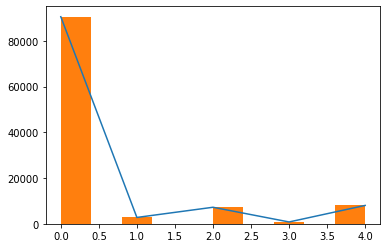

In [12]:
#Class distribution Mitbih
import matplotlib.pyplot as plt
unique, counts = np.unique(mitbih.iloc[:,-1], return_counts=True)
print(unique)
print(counts)
plt.plot(unique,counts)
plt.hist(mitbih.iloc[:,-1])
#Interpretation: As we can see there is a huge class imbalance especially between the 0 class and the others. Furthermore we 
#can observe that class 3 in particular has very few samples. This suggests that dealing with imbalance (using techniques like smote)
#or weighing the losses could be very beneficial

[0. 1.]
[ 4046 10506]


(array([ 4046.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10506.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

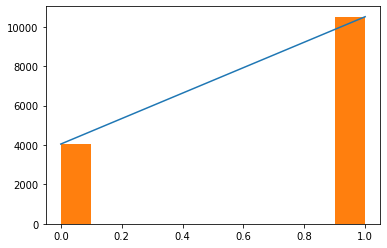

In [14]:
#Class distribution Ptbdb
import matplotlib.pyplot as plt
unique, counts = np.unique(ptbdb.iloc[:,-1], return_counts=True)
print(unique)
print(counts)
plt.plot(unique,counts)
plt.hist(ptbdb.iloc[:,-1])
#Interpretation: There is again a huge amount of class imbalance between the abnormal and the normal classes
#This suggests that dealing with imbalance (using techniques like smote)
#or weighing the losses could be very beneficial


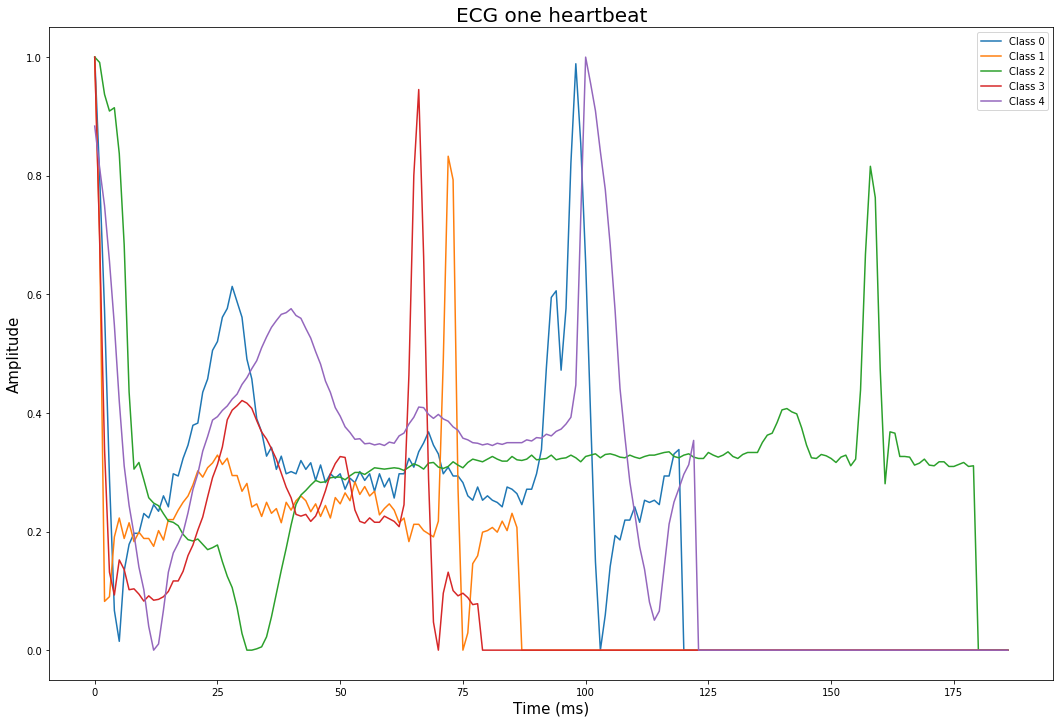

In [15]:
#Plotting mitbih all 5 classes
class_0=mitbih[mitbih.iloc[:,-1]==0]
class_0=class_0.iloc[:,0:(class_0.shape[1]-1)]
class_1=mitbih[mitbih.iloc[:,-1]==1]
class_1=class_1.iloc[:,0:(class_1.shape[1]-1)]
class_2=mitbih[mitbih.iloc[:,-1]==2]
class_2=class_2.iloc[:,0:(class_2.shape[1]-1)]
class_3=mitbih[mitbih.iloc[:,-1]==3]
class_3=class_3.iloc[:,0:(class_3.shape[1]-1)]
class_4=mitbih[mitbih.iloc[:,-1]==4]
class_4=class_4.iloc[:,0:(class_4.shape[1]-1)]
rand_int=np.random.randint(0,800,1)
plt.figure(figsize=(18,12))
plt.plot(class_0.iloc[0,:], label="Class 0")
plt.plot(class_1.iloc[0,:], label="Class 1")
plt.plot(class_2.iloc[0,:], label="Class 2")
plt.plot(class_3.iloc[0,:], label="Class 3")
plt.plot(class_4.iloc[0,:], label="Class 4")
plt.legend()
plt.title("ECG one heartbeat", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()


No handles with labels found to put in legend.


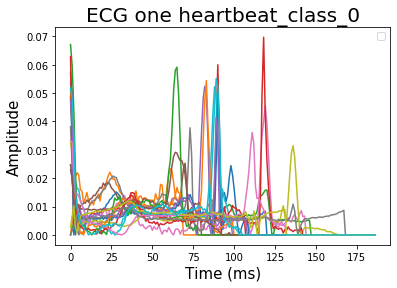

In [16]:
#MITBIH class 0
from sklearn.preprocessing import normalize
data_10=normalize(class_0.iloc[0:20,:], axis=1, norm='l1')
for i in range (0,20):
    data=data_10[i,:]
    plt.plot(data)
plt.legend()
plt.title("ECG one heartbeat_class_0", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

(array([2.94988251e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.94988251e-04, 5.89976501e-04, 1.47494125e-03, 1.76992950e-03,
        2.06491775e-03, 2.67162009e+01]),
 array([0.62578619, 0.66320757, 0.70062895, 0.73805033, 0.77547171,
        0.81289309, 0.85031447, 0.88773586, 0.92515724, 0.96257862,
        1.        ]),
 <a list of 10 Patch objects>)

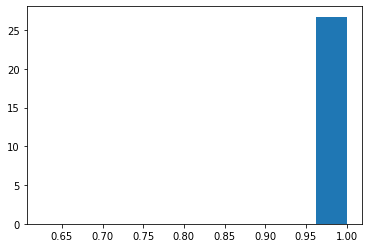

In [23]:
#histogram of amplitude
ampli_0=np.max(class_0,axis=1)
plt.hist(ampli_0,density=True)

No handles with labels found to put in legend.


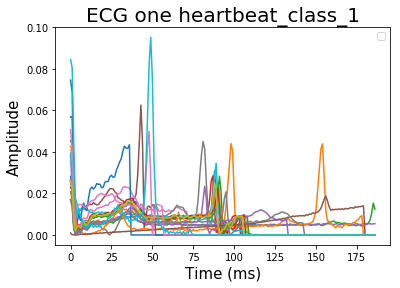

In [77]:
#MITBIH class 1
from sklearn.preprocessing import normalize
data_10=normalize(class_1.iloc[0:20,:], axis=1, norm='l1')
for i in range (0,20):
    data=data_10[i,:]
    plt.plot(data)
plt.legend()
plt.title("ECG one heartbeat_class_1", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

(array([ 0.03095505,  0.03095505,  0.0412734 ,  0.13413857,  0.23732208,
         0.18573032,  0.31986889,  0.28891383,  0.39209735, 27.01344351]),
 array([0.6512605 , 0.68613445, 0.7210084 , 0.75588235, 0.7907563 ,
        0.82563025, 0.8605042 , 0.89537815, 0.9302521 , 0.96512605,
        1.        ]),
 <a list of 10 Patch objects>)

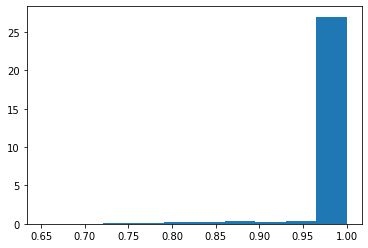

In [24]:
#histogram of amplitude
ampli_1=np.max(class_1,axis=1)
plt.hist(ampli_1,density=True)

No handles with labels found to put in legend.


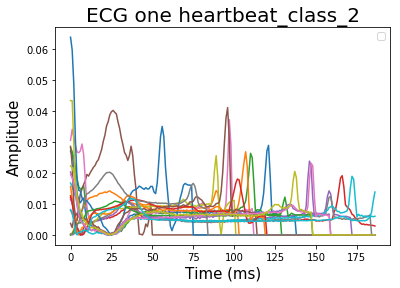

In [78]:
#MITBIH class 2
from sklearn.preprocessing import normalize
data_10=normalize(class_2.iloc[0:20,:], axis=1, norm='l1')
for i in range (0,20):
    data=data_10[i,:]
    plt.plot(data)
plt.legend()
plt.title("ECG one heartbeat_class_2", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

(array([7.16654780e-03, 7.16654780e-03, 0.00000000e+00, 1.07498217e-02,
        3.58327390e-03, 0.00000000e+00, 3.58327390e-03, 0.00000000e+00,
        1.07498217e-02, 2.58855706e+01]),
 array([0.61432505, 0.65289254, 0.69146004, 0.73002753, 0.76859503,
        0.80716252, 0.84573002, 0.88429751, 0.92286501, 0.9614325 ,
        1.        ]),
 <a list of 10 Patch objects>)

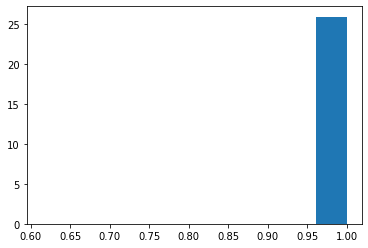

In [26]:
#histogram of amplitude
ampli_2=np.max(class_2,axis=1)
plt.hist(ampli_2,density=True)

No handles with labels found to put in legend.


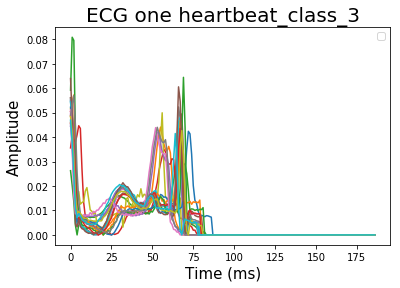

In [79]:
#MITBIH class 3
from sklearn.preprocessing import normalize
data_10=normalize(class_3.iloc[0:20,:], axis=1, norm='l1')
for i in range (0,20):
    data=data_10[i,:]
    plt.plot(data)
plt.legend()
plt.title("ECG one heartbeat_class_3", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

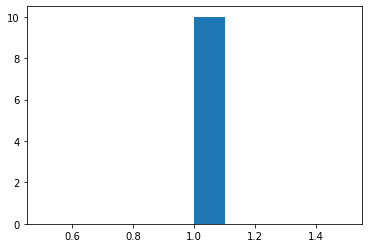

In [25]:
#amplitude histogram class 2
ampli_3=np.max(class_3,axis=1)
plt.hist(ampli_3,density=True)

No handles with labels found to put in legend.


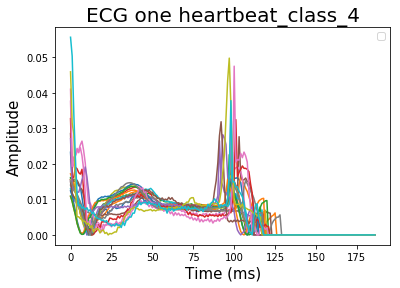

In [80]:
#MITBIH class 4
from sklearn.preprocessing import normalize
data_10=normalize(class_4.iloc[0:20,:], axis=1, norm='l1')
for i in range (0,20):
    data=data_10[i,:]
    plt.plot(data)
plt.legend()
plt.title("ECG one heartbeat_class_4", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

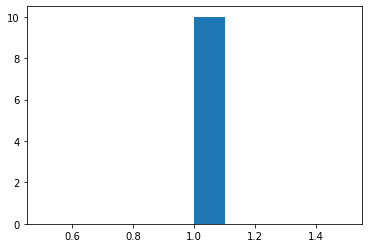

In [27]:
#amplitude histogram class 4
ampli_4=np.max(class_4,axis=1)
plt.hist(ampli_4,density=True)

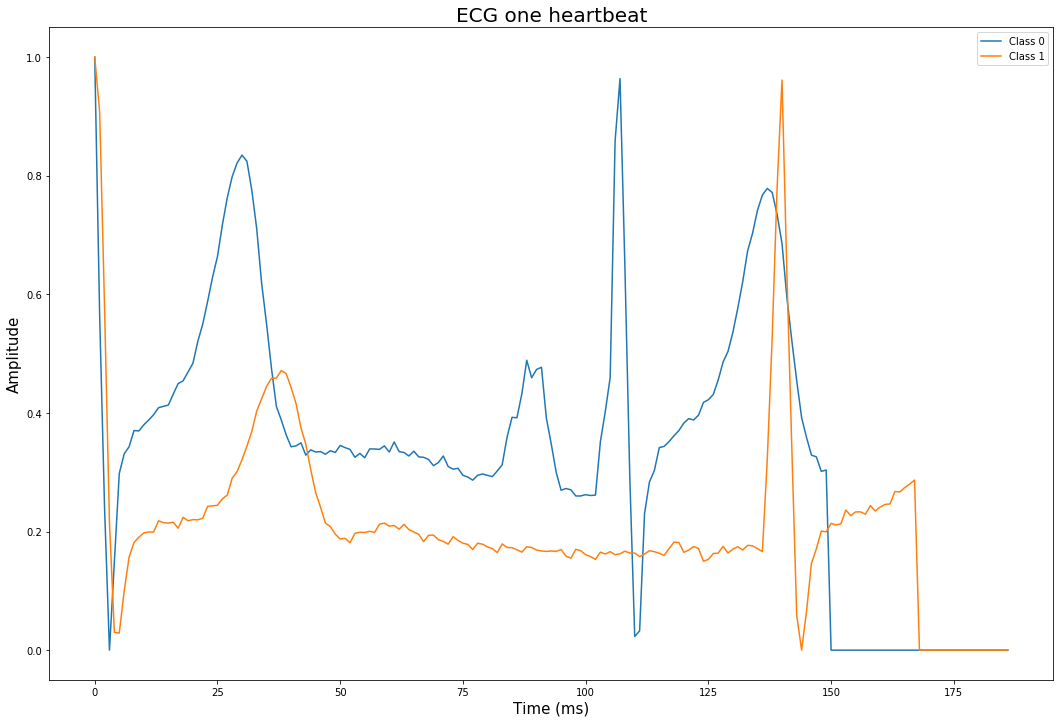

In [29]:
#Plotting ptbdb all classes
class_0=ptbdb[ptbdb.iloc[:,-1]==0]
class_0=class_0.iloc[:,0:(class_0.shape[1]-1)]
class_1=ptbdb[ptbdb.iloc[:,-1]==1]
class_1=class_1.iloc[:,0:(class_1.shape[1]-1)]
rand_int=np.random.randint(0,800,1)
plt.figure(figsize=(18,12))
plt.plot(class_0.iloc[0,:], label="Class 0")
plt.plot(class_1.iloc[0,:], label="Class 1")
plt.legend()
plt.title("ECG one heartbeat", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

No handles with labels found to put in legend.


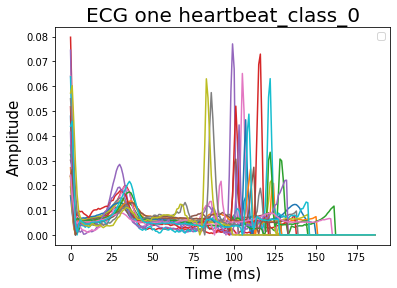

In [30]:
#PTB class 0
from sklearn.preprocessing import normalize
data_10=normalize(class_0.iloc[0:20,:], axis=1, norm='l1')
for i in range (0,20):
    data=data_10[i,:]
    plt.plot(data)
plt.legend()
plt.title("ECG one heartbeat_class_0", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

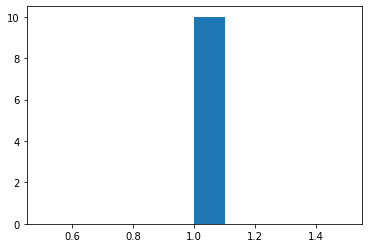

In [32]:
#Histogram Class 0
ampli_0=np.max(class_0,axis=1)
plt.hist(ampli_0,density=True)

No handles with labels found to put in legend.


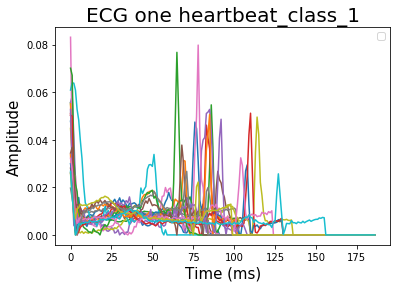

In [83]:
#PTB class 1
from sklearn.preprocessing import normalize
data_10=normalize(class_1.iloc[0:20,:], axis=1, norm='l1')
for i in range (0,20):
    data=data_10[i,:]
    plt.plot(data)
plt.legend()
plt.title("ECG one heartbeat_class_1", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

(array([ 0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

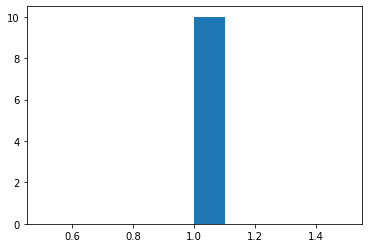

In [33]:
#Histogram Class 1
ampli_1=np.max(class_1,axis=1)
plt.hist(ampli_1,density=True)